# Analyze results of Multilabel classification on Yelp Dataset

This notebook analyzes the results of the yelp-multilabel ipython notebook. It expects the ests and gts arrays in the
same folder as files.

In [21]:
import numpy as np
gts = np.load('gts.npy')
ests = np.load('ests.npy')
business_ids = np.load('business_ids.npy')
photo_ids = np.load('photo_ids.npy')

In [22]:
# these are the Yelp classes, we'll need them later.
classes = np.asarray(['good_for_lunch', 'good_for_dinner', 'takes_reservations', 'outdoor_seating',
                      'restaurant_is_expensive', 'has_alcohol', 'has_table_service', 'ambience_is_classy',
                      'good_for_kids'])

In [23]:
# For now, lets just analyze one class: good for lunch.
class_of_interest = 0

Lets seperate places into two groups, those which are good for lunch, and those with are bad.

In [24]:
from collections import defaultdict
# Create a dict with ground truths.
business_attr = defaultdict(list)
for gt, b_id in zip(gts, business_ids):
    attr = business_attr[b_id]
    # fill in ground truth only once.
    if not len(attr):
        business_attr[b_id] = gt

In [25]:
# Now we'll seperate ests into positive and negative classes.
ests_positive = []
ests_negative = []
for preds, b_id in zip(ests, business_ids):
    if business_attr[b_id][class_of_interest] == 1:
        ests_positive.append(preds)
    else:
        ests_negative.append(preds)
ests_positive = np.asarray(ests_positive)
ests_negative = np.asarray(ests_negative)

In [26]:
# Compare the number of elements in positive and negative classes.
print 'Percentage of restautants that are ' + classes[class_of_interest] + ': {0:.4f}'.format(len(ests_positive)*100.0/len(ests))
print 'Percentage of restautants that are not ' + classes[class_of_interest] + ': {0:.4f}'.format(len(ests_negative)*100.0/len(ests))
print len(ests)

Percentage of restautants that are good_for_lunch: 26.1596
Percentage of restautants that are not good_for_lunch: 73.8404
48896


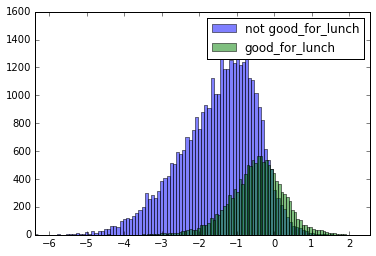

In [27]:
# Show a distribution of the scores for 'good_for_lunch'. Split by ground truth.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_score(preds_positive_class, preds_negative_class, class_of_interest, title, bins):
    preds_positive_class_T = np.transpose(preds_positive_class)
    preds_negative_class_T = np.transpose(preds_negative_class)
    vals_positive = np.round(preds_positive_class_T[class_of_interest], decimals=2)
    vals_negative = np.round(preds_negative_class_T[class_of_interest], decimals=2)
    plt.hist(vals_negative, bins, alpha=0.5, label='not ' + classes[class_of_interest])
    plt.hist(vals_positive, bins, alpha=0.5, label=classes[class_of_interest] )
    plt.legend(loc='upper right')

    plt.gca().set_xlim(vals_negative.min(), vals_positive.max())
    plt.show()

plot_score(ests_positive, ests_negative, class_of_interest, "Score distribution of " + classes[class_of_interest], 100)

In [28]:
# We can't expect every image to show evidence of the class.
# What about seperation of mean scores.
import sys
business_preds=defaultdict(list)
# First group by business.
for image_pred, b_id in zip(ests, business_ids):
    business_preds[b_id].append(image_pred)

# Then compute mean scores for each business.
for b_id, image_preds in business_preds.iteritems():
    # Take a mean for all images in one business.
    image_preds = np.asarray(image_preds)
    business_preds[b_id] = np.mean(image_preds, axis=0)

In [29]:
# Now seperate the aggregated estimates into positive and negative classes.
# Now we'll seperate ests into positive and negative classes.
preds_positive = []
preds_negative = []
for b_id, preds in business_preds.iteritems():
    if business_attr[b_id][class_of_interest] == 1:
        preds_positive.append(preds)
    else:
        preds_negative.append(preds)
preds_positive = np.asarray(preds_positive)
preds_negative = np.asarray(preds_negative)
print preds_positive.shape
print preds_negative.shape

(145, 9)
(255, 9)


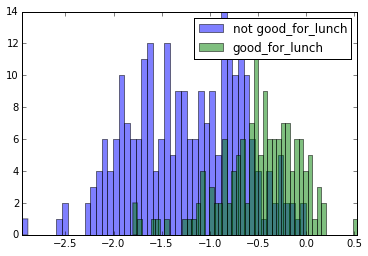

In [30]:
plot_score(preds_positive, preds_negative, class_of_interest, "Score distribution of " + classes[class_of_interest], 50)